# Lead Scoring Case Study

In [1]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Supressing the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set

from IPython.display import display
pd.options.display.max_columns = None
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the shapeof the dataset

leads.shape

(9240, 37)

In [4]:
#Checking the columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
leads.describe(include= 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,834e66d6-a45b-4b27-90e5-9482f30a2122,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [6]:
#checking the info of the columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

**There are many categorical values for which we will have to create the dummy varibales, also there are some missing values as well.**

## Data Cleaning

In [7]:
#Checking the number of missing valus in each columns

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are many columns with missing values. We will drop the columns which have more than 3000 missing values.

In [8]:
# Dropping columns with more than 3000 missing values

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace = True)

In [9]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Also dropping **City** and **Country** columns as they are relevant for our excercise.

In [10]:
#Dropping City column

leads.drop(['City'], axis = 1, inplace = True)

In [11]:
#Dropping Country column

leads.drop(['Country'], axis = 1, inplace = True)

In [12]:
#Checking the percentage of missing values in each column

round(100*leads.isnull().sum()/len(leads.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

**Now we have to replace the label 'Select' with null as it means that the student has not selected any vlaue for that particular field.**

In [13]:
leads.shape

(9240, 29)

In [14]:
#Checking the value counts of each column

cols=list(leads.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(leads[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
  
text # column names having label 'Select'

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [15]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Since **Lead Profile** and **How did you hear about X Education** have a lot of rows which have value as **Select**, we will drop these columns as they wont be useful for analysis.

In [18]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [19]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
#Dropping uncessary columns

leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque',], axis = 1, inplace = True)


In [21]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Also for the column **What matters most to you in choosing a course** only one value : Better Career Prospects occurs mostly and the other two rarely occur, so we should also drop this column.

In [22]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [23]:
#Checking the null values

leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now since the column **What is your current occupation** has a lot of missing values, we will drop those rows.

In [24]:
#Dropping the null values in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [25]:
#Checking the null values again

leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Now since the rest of the columns have very few null values. We can drop those columns

In [26]:
#Dropping the null values in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [27]:
#Checking the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [28]:
#Dropping the null values in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [29]:
#Checking the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
#Dropping the null values in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [31]:
#Checking the null values again

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [32]:
#Checking the dataframe again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


'Prospect ID' and 'Lead Number' wont be useful for the analysis. So we will drop these columns.

In [33]:
# Dropping 'Prospect ID' and 'Lead Number' columns

leads.drop(['Prospect ID' , 'Lead Number'], axis = 1, inplace = True)

In [34]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Visualising the data and EDA

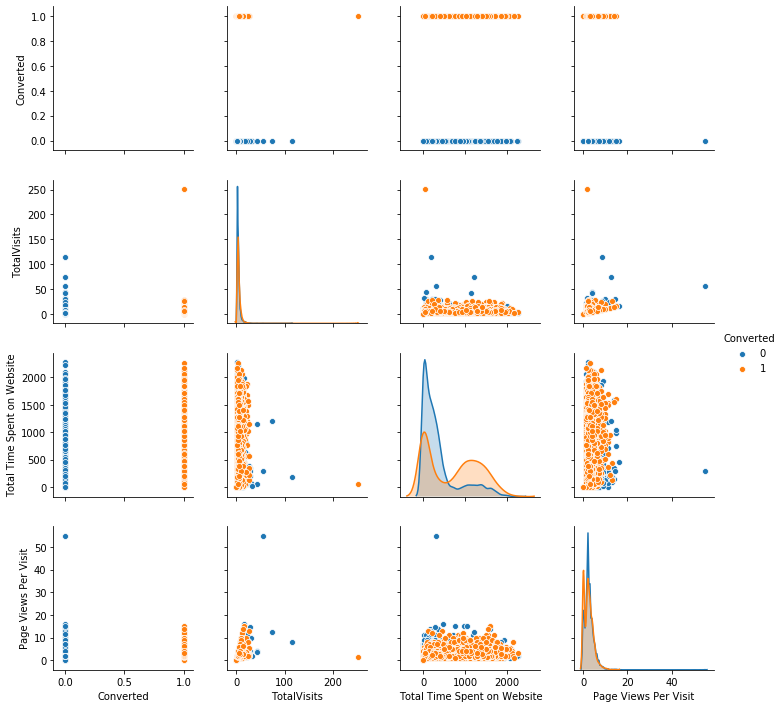

In [35]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

sns.pairplot(leads, diag_kind = 'kde', hue='Converted')


We can see the data is definitely Right Skewed

In [36]:
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000
mean,3.624196,535.224541,2.480464
std,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.000000,3.500000
90%,8.000000,1428.800000,5.000000
99%,18.000000,1849.280000,9.000000
max,251.000000,2272.000000,55.000000


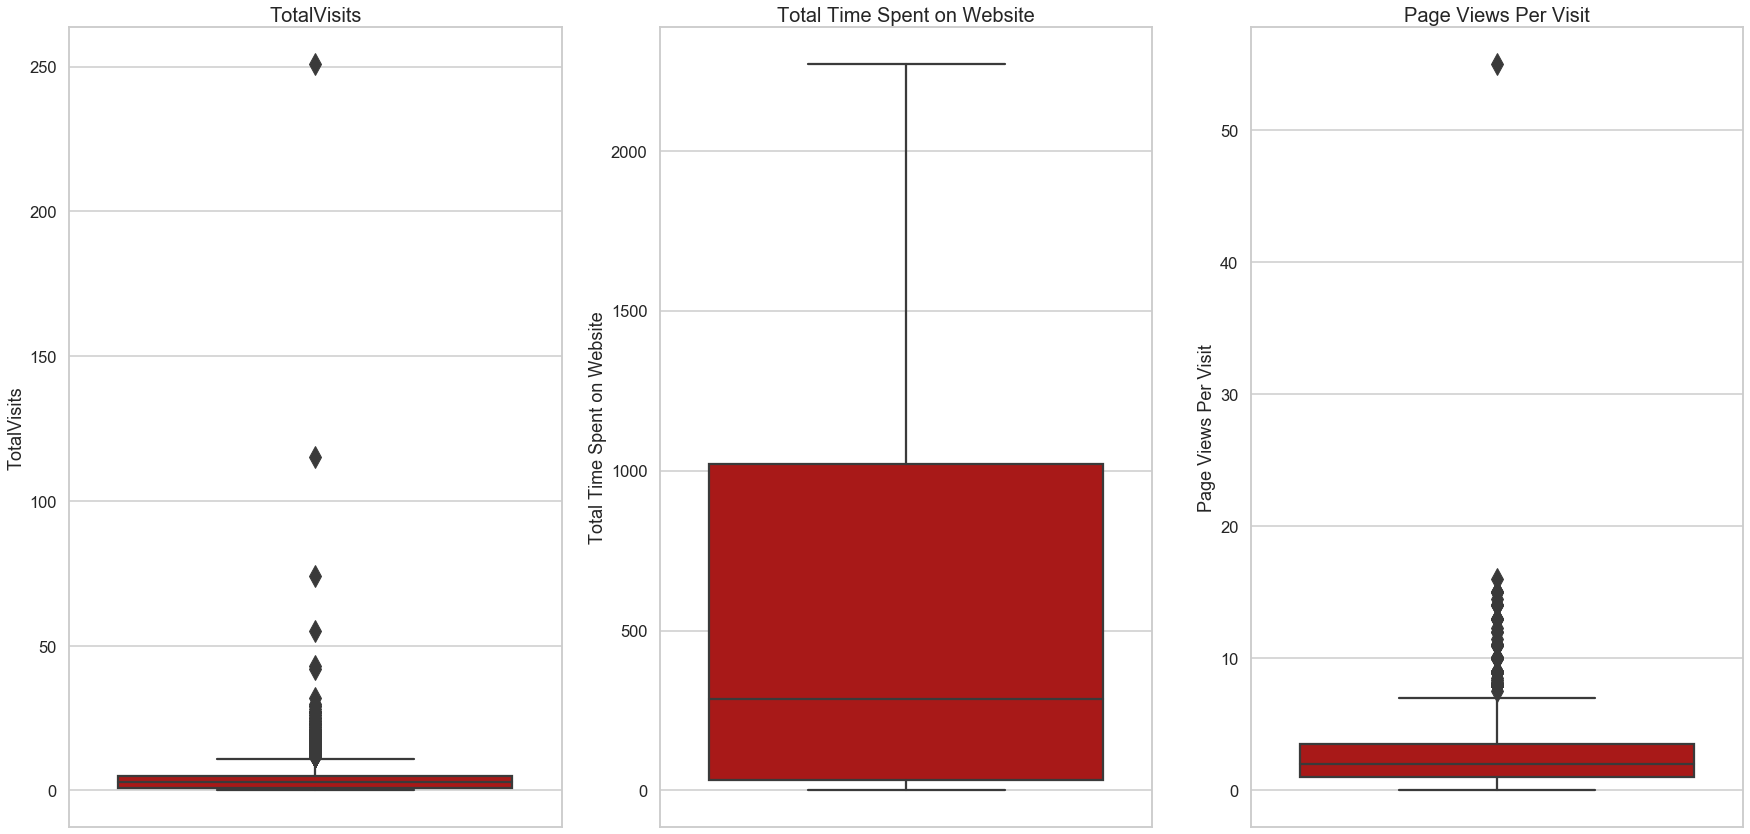

In [37]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=leads[col[i]],data=leads,palette='gist_heat',orient='v',fliersize=15)  # using boxplot

There are definitely some outliers present in the data.

## Dummy Variable Creation

In [38]:
# Extracting the columns of 'Object' type

temp = leads.loc[:,leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# Creating the dummy variables

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)

# Adding the dummies to the leads dataframe

leads = pd.concat([leads,dummy], axis=1)


In [40]:
# Creating dummy variable for 'specialization'. It has a level 'Select' which is not useful for our analysis, 
# so we will drop it.

sp_dummy = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
sp_dummy = sp_dummy.drop('Specialization_Select', 1)


leads = pd.concat([leads,sp_dummy], axis=1)

In [41]:
# Dropping the columns for which dummies are created.

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity','Specialization'], 1)



In [42]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [43]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 93 columns):
Converted                                               6373 non-null int64
TotalVisits                                             6373 non-null float64
Total Time Spent on Website                             6373 non-null int64
Page Views Per Visit                                    6373 non-null float64
Lead Origin_Landing Page Submission                     6373 non-null uint8
Lead Origin_Lead Add Form                               6373 non-null uint8
Lead Origin_Lead Import                                 6373 non-null uint8
Lead Source_Direct Traffic                              6373 non-null uint8
Lead Source_Facebook                                    6373 non-null uint8
Lead Source_Google                                      6373 non-null uint8
Lead Source_Live Chat                                   6373 non-null uint8
Lead Source_Olark Chat                               

## Data Preparation

### Train-Test Split 

In [44]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [45]:
# Separating target varaible from dependent variable

y=leads['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Putting dependent variable in a new dataset called 'X'

X=leads.drop('Converted',1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [47]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [49]:
# Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

48.093519535540565

We have conversion rate of almost 48%

### Correlation of the dataset

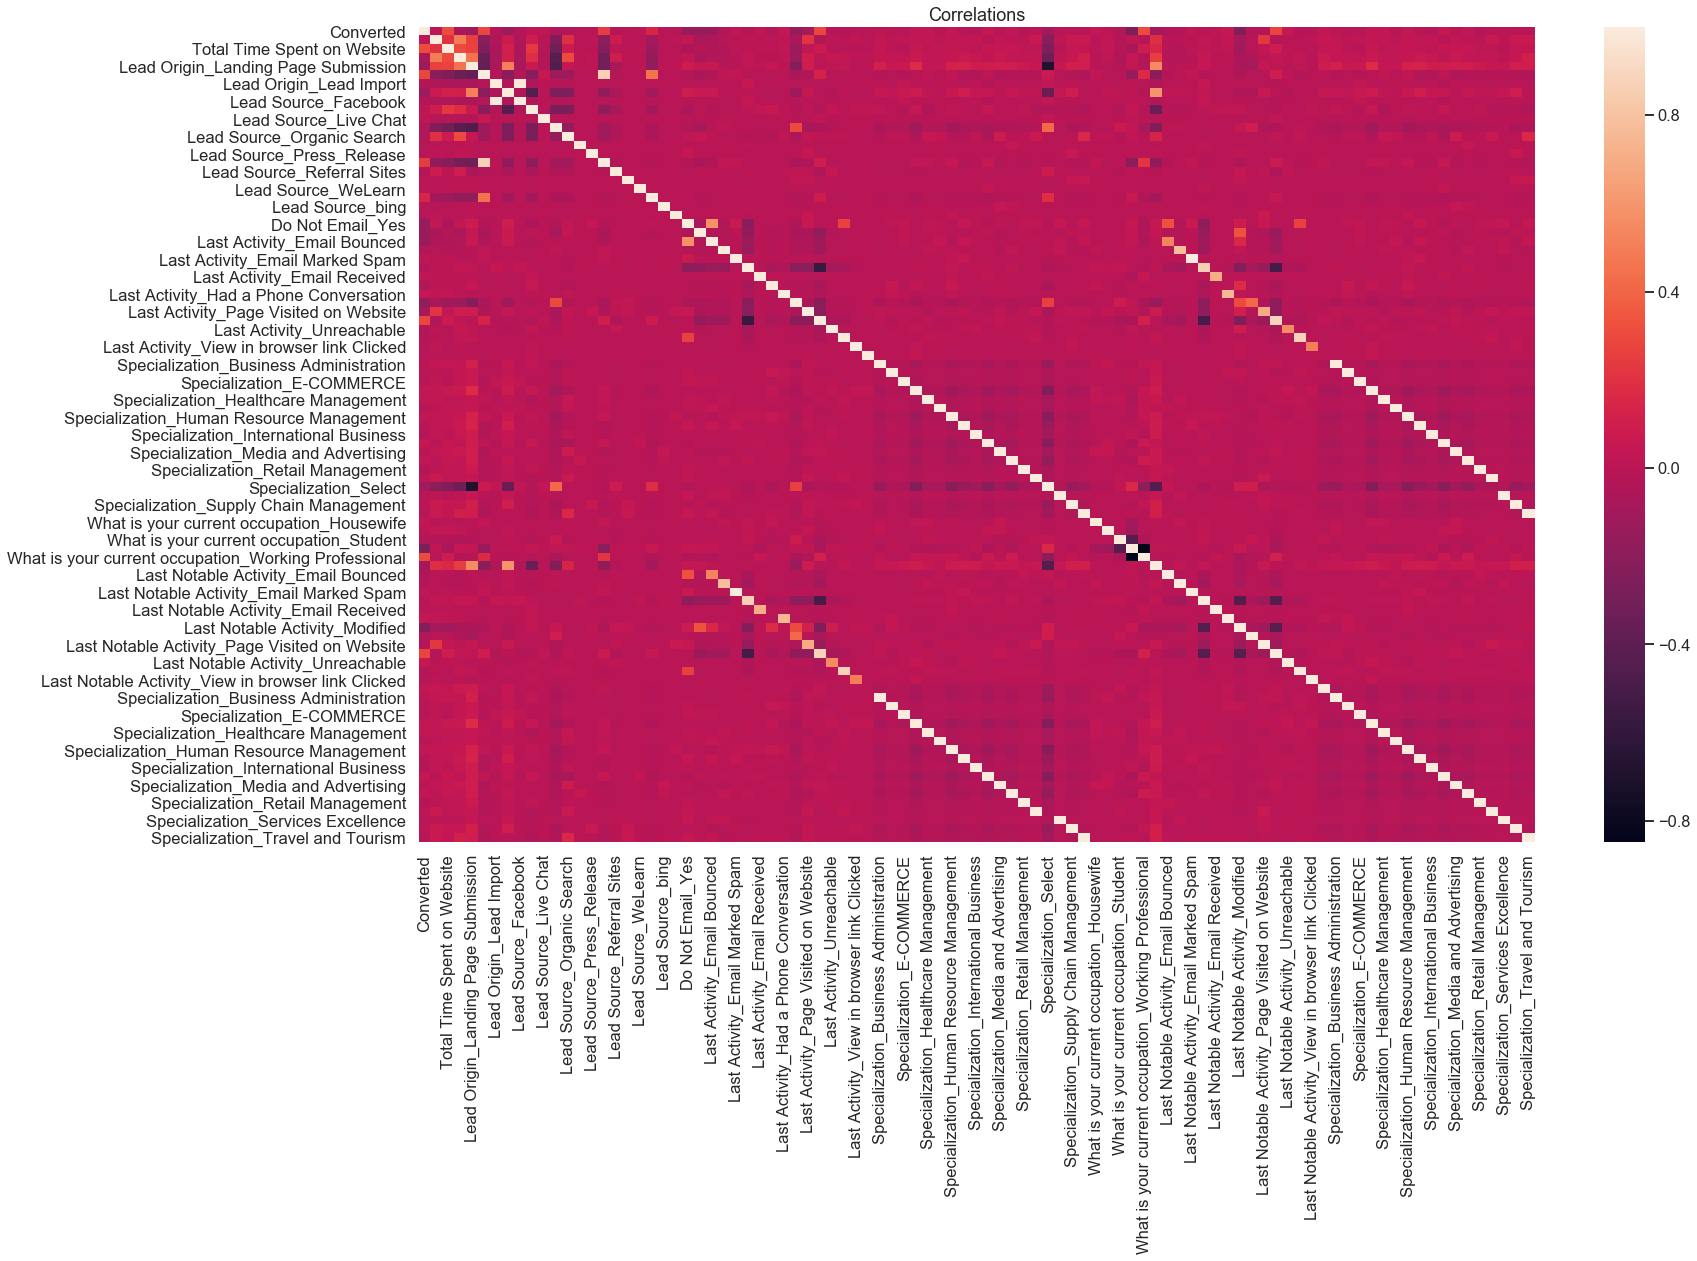

In [50]:
# setting the figure size

plt.figure(figsize=(25,15))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(leads.corr())

plt.show()

## Building the model

In [51]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

In [52]:
# Using RFE to select top 16 features

rfe = RFE(logreg,16)

rfe = rfe.fit(X_train,y_train)

In [53]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 66),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 60),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 68),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 77),
 ('Lead Source_WeLearn', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 20),
 ('Lead Source_testone', False, 33),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Cl

In [54]:
# Putting columns selected by RFE in variable col

col = X_train.columns[rfe.support_]

In [55]:
# Selecting only the colums selected by RFE

X_train = X_train[col]

In [56]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train)


In [57]:
# Running the linear model

logis0=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res0 = logis0.fit()  

In [58]:
res0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.9
Date:                Sun, 22 Nov 2020   Deviance:                       4081.9
Time:                        12:21:31   Pearson chi2:                 4.93e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2503      0.602     -0.416      0.678      -1.430       0.929
TotalVisits                                             10.6160      2.671      3.975      0.000       5.382      15.850
Total Time Spent on Website                              4.3550      0.186     23.380      0.000       3.990       4.720
Lead Origin_Landing Page Submission                     -0.9779      0.137     -7.135      0.000      -1.246      -0.709
Lead Origin_Lead Add Form                                3.6692      0.271     13.534      0.000       3.138       4.201
Lead Source_Olark Chat                                   1.2917      0.141      9.134      0.000       1.015       1.569
Lead Source_Welingak Website                             2.6626      1.039      2.562      0.010       0.626       4.700
Do Not Email_Yes                                        -1.4748      0.195     -7.577      0.000      -1.856      -1.093
Last Activity_Had a Phone Conversation                   1.1301      0.978      1.156      0.248      -0.786       3.046
Last Activity_SMS Sent                                   1.2123      0.083     14.581      0.000       1.049       1.375
Specialization_Select                                   -0.9926      0.135     -7.347      0.000      -1.257      -0.728
What is your current occupation_Housewife               22.8096   2.38e+04      0.001      0.999   -4.66e+04    4.67e+04
What is your current occupation_Student                 -0.9648      0.627     -1.540      0.124      -2.193       0.263
What is your current occupation_Unemployed              -1.1499      0.588     -1.954      0.051      -2.303       0.003
What is your current occupation_Working Professional     1.3224      0.618      2.140      0.032       0.111       2.534
Last Notable Activity_Had a Phone Conversation          23.0334   2.08e+04      0.001      0.999   -4.07e+04    4.08e+04
Last Notable Activity_Unreachable                        2.6846      0.807      3.325      0.001       1.102       4.267
========================================================================================================================
"""

There are a few features which have p-value greater than 0.05. We will have to handle those

#### We will also look at the VIF for this model


In [59]:
# Importing the variance_inflation_factor 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Creating vif dataframe

vif=pd.DataFrame()
vif['Features']=X_train.columns  
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,11.75
2,Lead Origin_Landing Page Submission,6.60
9,Specialization_Select,3.30
7,Last Activity_Had a Phone Conversation,2.44
14,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.40
3,Lead Origin_Lead Add Form,2.21
13,What is your current occupation_Working Profes...,2.21
4,Lead Source_Olark Chat,1.90
0,TotalVisits,1.63


As we can see that few features are having vif values more than 5, hence there is multicollinearity in the dataset.

We will drop the highest in-significant features i.e **'What is your current occupation_Housewife'** having 0.999 p - value.

In [61]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_1=X_train_sm.drop(['const','What is your current occupation_Housewife'],1)

In [62]:
# Creating a new model

X_train_1=sm.add_constant(X_train_1)                              # Adding constant
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())  # Using GLM, creating model
reg1=logis1.fit()                                                 # Fitting our model
reg1.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.5
Date:                Sun, 22 Nov 2020   Deviance:                       4086.9
Time:                        12:21:31   Pearson chi2:                 4.93e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3440      0.564      0.610      0.542      -0.761       1.449
TotalVisits                                             10.3854      2.653      3.914      0.000       5.185      15.586
Total Time Spent on Website                              4.3516      0.186     23.372      0.000       3.987       4.717
Lead Origin_Landing Page Submission                     -0.9705      0.137     -7.085      0.000      -1.239      -0.702
Lead Origin_Lead Add Form                                3.6697      0.271     13.539      0.000       3.138       4.201
Lead Source_Olark Chat                                   1.2893      0.141      9.121      0.000       1.012       1.566
Lead Source_Welingak Website                             2.6602      1.039      2.560      0.010       0.623       4.697
Do Not Email_Yes                                        -1.4783      0.195     -7.586      0.000      -1.860      -1.096
Last Activity_Had a Phone Conversation                   1.1314      0.977      1.158      0.247      -0.784       3.047
Last Activity_SMS Sent                                   1.2115      0.083     14.576      0.000       1.049       1.374
Specialization_Select                                   -0.9896      0.135     -7.326      0.000      -1.254      -0.725
What is your current occupation_Student                 -1.5596      0.590     -2.642      0.008      -2.717      -0.403
What is your current occupation_Unemployed              -1.7443      0.550     -3.173      0.002      -2.822      -0.667
What is your current occupation_Working Professional     0.7275      0.581      1.252      0.211      -0.412       1.867
Last Notable Activity_Had a Phone Conversation          22.0331   1.26e+04      0.002      0.999   -2.47e+04    2.47e+04
Last Notable Activity_Unreachable                        2.6807      0.808      3.318      0.001       1.097       4.264
========================================================================================================================
"""

In [63]:
#Checking the VIF

X_train_vif=X_train_1.drop('const',1) 
vif=pd.DataFrame()
vif['Features']=X_train_vif.columns  
vif['VIF']=[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,11.56
2,Lead Origin_Landing Page Submission,6.51
9,Specialization_Select,3.28
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
12,What is your current occupation_Working Profes...,2.19
3,Lead Origin_Lead Add Form,2.18
4,Lead Source_Olark Chat,1.89
0,TotalVisits,1.63


Again, we can see from above summary that variable **'Last Notable Activity_Had a Phone Conversation'** is in-significant hence dropping it and recreating a new model

In [64]:
# Dropping the most insignificant values ('What is your current occupation_Working Professional') and constant

X_train_2=X_train_1.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [65]:
# Creating a new model

X_train_2=sm.add_constant(X_train_2)                              # Adding constant
logis2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
reg2.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.1
Date:                Sun, 22 Nov 2020   Deviance:                       4092.3
Time:                        12:21:32   Pearson chi2:                 4.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3432      0.564      0.609      0.543      -0.762       1.449
TotalVisits                                             10.4476      2.655      3.935      0.000       5.244      15.651
Total Time Spent on Website                              4.3444      0.186     23.348      0.000       3.980       4.709
Lead Origin_Landing Page Submission                     -0.9686      0.137     -7.078      0.000      -1.237      -0.700
Lead Origin_Lead Add Form                                3.6719      0.271     13.547      0.000       3.141       4.203
Lead Source_Olark Chat                                   1.2931      0.141      9.145      0.000       1.016       1.570
Lead Source_Welingak Website                             2.6627      1.039      2.562      0.010       0.626       4.700
Do Not Email_Yes                                        -1.4788      0.195     -7.591      0.000      -1.861      -1.097
Last Activity_Had a Phone Conversation                   2.7274      0.801      3.407      0.001       1.158       4.297
Last Activity_SMS Sent                                   1.2113      0.083     14.577      0.000       1.048       1.374
Specialization_Select                                   -0.9953      0.135     -7.371      0.000      -1.260      -0.731
What is your current occupation_Student                 -1.5582      0.590     -2.640      0.008      -2.715      -0.401
What is your current occupation_Unemployed              -1.7425      0.550     -3.169      0.002      -2.820      -0.665
What is your current occupation_Working Professional     0.7259      0.581      1.249      0.212      -0.413       1.865
Last Notable Activity_Unreachable                        2.6796      0.808      3.317      0.001       1.096       4.263
========================================================================================================================
"""

In [66]:
#Checking the VIF

X_train_vif=X_train_2.drop('const',1) 
vif=pd.DataFrame()
vif['Features']=X_train_vif.columns  
vif['VIF']=[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,11.56
2,Lead Origin_Landing Page Submission,6.51
9,Specialization_Select,3.28
1,Total Time Spent on Website,2.38
12,What is your current occupation_Working Profes...,2.19
3,Lead Origin_Lead Add Form,2.18
4,Lead Source_Olark Chat,1.89
0,TotalVisits,1.63
8,Last Activity_SMS Sent,1.60
5,Lead Source_Welingak Website,1.40


Again, from above summary we can see that one variable **'What is your current occupation_Working Professional'** is insignificant hence dropping from the dataset.

In [67]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_3=X_train_2.drop(['const','What is your current occupation_Working Professional'],1)

In [68]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                              # Adding constant
logis3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial())  # Using GLM, creating model
reg3=logis3.fit()                                                 # Fitting our model
reg3.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.8
Date:                Sun, 22 Nov 2020   Deviance:                       4093.7
Time:                        12:21:32   Pearson chi2:                 4.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.9993      0.226      4.418      0.000       0.556       1.443
TotalVisits                                   10.3392      2.649      3.904      0.000       5.148      15.530
Total Time Spent on Website                    4.3441      0.186     23.346      0.000       3.979       4.709
Lead Origin_Landing Page Submission           -0.9676      0.137     -7.071      0.000      -1.236      -0.699
Lead Origin_Lead Add Form                      3.6715      0.271     13.547      0.000       3.140       4.203
Lead Source_Olark Chat                         1.2931      0.141      9.147      0.000       1.016       1.570
Lead Source_Welingak Website                   2.6617      1.039      2.561      0.010       0.625       4.699
Do Not Email_Yes                              -1.4766      0.195     -7.584      0.000      -1.858      -1.095
Last Activity_Had a Phone Conversation         2.7312      0.800      3.413      0.001       1.163       4.300
Last Activity_SMS Sent                         1.2147      0.083     14.637      0.000       1.052       1.377
Specialization_Select                         -0.9957      0.135     -7.374      0.000      -1.260      -0.731
What is your current occupation_Student       -2.2140      0.287     -7.725      0.000      -2.776      -1.652
What is your current occupation_Unemployed    -2.3986      0.189    -12.714      0.000      -2.768      -2.029
Last Notable Activity_Unreachable              2.6807      0.808      3.318      0.001       1.097       4.264
==============================================================================================================
"""

In [69]:
#Checking the VIF

X_train_vif=X_train_3.drop('const',1) 
vif=pd.DataFrame()
vif['Features']=X_train_vif.columns  
vif['VIF']=[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,6.52
2,Lead Origin_Landing Page Submission,4.64
9,Specialization_Select,2.83
1,Total Time Spent on Website,2.08
4,Lead Source_Olark Chat,1.62
0,TotalVisits,1.58
3,Lead Origin_Lead Add Form,1.56
8,Last Activity_SMS Sent,1.55
5,Lead Source_Welingak Website,1.35
10,What is your current occupation_Student,1.20


From above VIF table we can see that one variable **'What is your current occupation_Unemployed'** is having VIF >5, hence dropping from the dataset and recreating the model.

In [70]:
# Dropping the most insignificant values ('What is your current occupation_Unemployed') and constant

X_train_4=X_train_3.drop(['const','What is your current occupation_Unemployed'],1)

In [71]:
# Recreating a new model

X_train_4=sm.add_constant(X_train_4)                              # Adding constant
logis4=sm.GLM(y_train,X_train_4,family=sm.families.Binomial())  # Using GLM, creating model
reg4=logis4.fit()                                                 # Fitting our model
reg4.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.8
Date:                Sun, 22 Nov 2020   Deviance:                       4325.5
Time:                        12:21:32   Pearson chi2:                 4.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0425      0.144     -7.234      0.000      -1.325      -0.760
TotalVisits                                10.3131      2.613      3.947      0.000       5.192      15.434
Total Time Spent on Website                 4.3971      0.182     24.179      0.000       4.041       4.754
Lead Origin_Landing Page Submission        -1.1244      0.132     -8.532      0.000      -1.383      -0.866
Lead Origin_Lead Add Form                   3.7455      0.267     14.010      0.000       3.222       4.269
Lead Source_Olark Chat                      1.2931      0.139      9.287      0.000       1.020       1.566
Lead Source_Welingak Website                2.5433      1.039      2.448      0.014       0.507       4.580
Do Not Email_Yes                           -1.4450      0.184     -7.849      0.000      -1.806      -1.084
Last Activity_Had a Phone Conversation      2.7251      0.784      3.475      0.001       1.188       4.262
Last Activity_SMS Sent                      1.2163      0.081     15.105      0.000       1.059       1.374
Specialization_Select                      -1.3236      0.131    -10.110      0.000      -1.580      -1.067
What is your current occupation_Student     0.0098      0.226      0.044      0.965      -0.433       0.453
Last Notable Activity_Unreachable           2.6711      0.797      3.352      0.001       1.109       4.233
===========================================================================================================
"""

In [72]:
#Checking the VIF

X_train_vif=X_train_4.drop('const',1) 
vif=pd.DataFrame()
vif['Features']=X_train_vif.columns  
vif['VIF']=[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.32
1,Total Time Spent on Website,2.00
9,Specialization_Select,1.75
0,TotalVisits,1.55
8,Last Activity_SMS Sent,1.55
4,Lead Source_Olark Chat,1.47
3,Lead Origin_Lead Add Form,1.42
5,Lead Source_Welingak Website,1.35
6,Do Not Email_Yes,1.09
10,What is your current occupation_Student,1.04


Again, from above summary we can see that one variable **'What is your current occupation_Student'** is insignificant hence dropping from the dataset and recreating the model.

In [73]:
# Dropping the most insignificant values ('What is your current occupation_Student') and constant

X_train_5=X_train_4.drop(['const','What is your current occupation_Student'],1)

In [74]:
# Recreating a new model

X_train_5=sm.add_constant(X_train_5)                              # Adding constant
logis5=sm.GLM(y_train,X_train_5,family=sm.families.Binomial())  # Using GLM, creating model
reg5=logis5.fit()                                                 # Fitting our model
reg5.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.8
Date:                Sun, 22 Nov 2020   Deviance:                       4325.5
Time:                        12:21:33   Pearson chi2:                 4.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0423      0.144     -7.239      0.000      -1.324      -0.760
TotalVisits                               10.3113      2.612      3.947      0.000       5.191      15.431
Total Time Spent on Website                4.3971      0.182     24.179      0.000       4.041       4.754
Lead Origin_Landing Page Submission       -1.1243      0.132     -8.532      0.000      -1.383      -0.866
Lead Origin_Lead Add Form                  3.7455      0.267     14.010      0.000       3.222       4.270
Lead Source_Olark Chat                     1.2934      0.139      9.302      0.000       1.021       1.566
Lead Source_Welingak Website               2.5431      1.039      2.448      0.014       0.507       4.579
Do Not Email_Yes                          -1.4451      0.184     -7.851      0.000      -1.806      -1.084
Last Activity_Had a Phone Conversation     2.7248      0.784      3.475      0.001       1.188       4.262
Last Activity_SMS Sent                     1.2161      0.080     15.131      0.000       1.059       1.374
Specialization_Select                     -1.3236      0.131    -10.110      0.000      -1.580      -1.067
Last Notable Activity_Unreachable          2.6707      0.797      3.352      0.001       1.109       4.232
==========================================================================================================
"""

In [75]:
#Checking the VIF

X_train_vif=X_train_5.drop('const',1) 
vif=pd.DataFrame()
vif['Features']=X_train_vif.columns  
vif['VIF']=[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.30
1,Total Time Spent on Website,2.00
9,Specialization_Select,1.75
0,TotalVisits,1.55
8,Last Activity_SMS Sent,1.55
4,Lead Source_Olark Chat,1.46
3,Lead Origin_Lead Add Form,1.42
5,Lead Source_Welingak Website,1.35
6,Do Not Email_Yes,1.09
7,Last Activity_Had a Phone Conversation,1.01


Now, from the above summary we can say that all the variables present in this model are **significant** as no variables is having p - value greater than 5%.

## Model Evaluation

In [76]:
# Predicting the train dataset with our final model

y_train_pred=reg5.predict(sm.add_constant(X_train_5))
y_train_pred.head(10)

8003    0.341533
218     0.162418
4171    0.145650
4037    0.254945
3660    0.980534
207     0.187309
2044    0.172834
6411    0.839682
6498    0.078341
2085    0.980599
dtype: float64

In [77]:
#Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34153332, 0.162418  , 0.14564975, 0.25494464, 0.98053352,
       0.18730887, 0.17283378, 0.8396817 , 0.07834143, 0.98059858])

In [78]:
# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_probability
0,0,0.341533
1,0,0.162418
2,1,0.145650
3,1,0.254945
4,1,0.980534


**Creating a new column 'Predicted' with value = 1  where probability >0.5 and value = 0 where probability <0.5**

In [79]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x >0.5 else 0 )
y_train_pred_final.head()

,Converted,Converted_probability,Predicted
0,0,0.341533,0
1,0,0.162418,0
2,1,0.145650,0
3,1,0.254945,0
4,1,0.980534,1


In [80]:
# Importing metrics for evaluation

from sklearn import metrics  

In [81]:
# Creating the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[1871  441]
 [ 562 1587]]


In [82]:
# Checking the accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))


0.7751625196144363


**Calculating other metrics**

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Calculating sensitivity
TP / float(TP+FN)

0.7384830153559795

In [85]:
# Calculating specificity
TN / float(TN+FP)

0.8092560553633218

In [86]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.1907439446366782


In [87]:
# positive predictive value 
print (TP / float(TP+FP))

0.7825443786982249


In [88]:
# Negative predictive value
print (TN / float(TN+ FN))

0.769009453349774


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

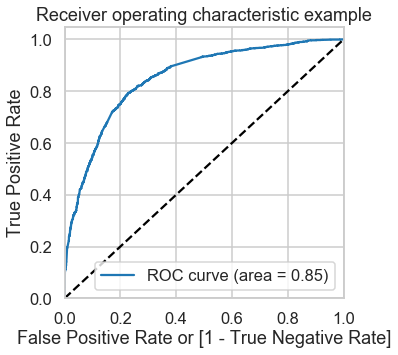

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above ROC curve -
- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 85% of the total area.

### Finding Optimal Cutoff Point

In [92]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.341533,0,1,1,1,1,0,0,0,0,0,0
1,0,0.162418,0,1,1,0,0,0,0,0,0,0,0
2,1,0.145650,0,1,1,0,0,0,0,0,0,0,0
3,1,0.254945,0,1,1,1,0,0,0,0,0,0,0
4,1,0.980534,1,1,1,1,1,1,1,1,1,1,1


In [93]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.522753  0.998139  0.080882
0.2   0.2  0.675633  0.948348  0.422145
0.3   0.3  0.756557  0.874826  0.646626
0.4   0.4  0.776508  0.814332  0.741349
0.5   0.5  0.775163  0.738483  0.809256
0.6   0.6  0.750504  0.615635  0.875865
0.7   0.7  0.724277  0.526757  0.907872
0.8   0.8  0.684824  0.402047  0.947664
0.9   0.9  0.630352  0.253606  0.980536


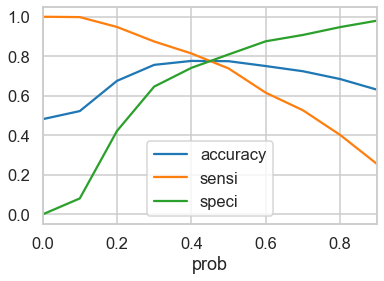

In [94]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.341533,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.162418,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.145650,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.254945,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.980534,1,1,1,1,1,1,1,1,1,1,1,1


In [96]:
# Checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7765075095270119

In [97]:
#Creating the confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1714,  598],
       [ 399, 1750]], dtype=int64)

**Calculating the other metrics again**

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Calculating sensitivity
TP / float(TP+FN)

0.8143322475570033

In [100]:
# Calculating specificity
TN / float(TN+FP)

0.7413494809688581

In [101]:
# Calculating false postive rate
print(FP/ float(TN+FP))

0.2586505190311419


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7453151618398637


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8111689540937056


### Precision and Recall

In [104]:
#Creating the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1871,  441],
       [ 562, 1587]], dtype=int64)

In [105]:
print('Precision',confusion[1,1]/(confusion[0,1]+confusion[1,1]))    # Printing Pecision score
print('Recall',confusion[1,1]/(confusion[1,0]+confusion[1,1]))       # Printing Recall score

Precision 0.7825443786982249
Recall 0.7384830153559795


- Our precison percentage is 78% approximately and recall  percentage is 74% approximately
- This means we have very good model which explains relevancy of 78% and true relevant results about 74%.

### Precision and Recall trade-off

In [106]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

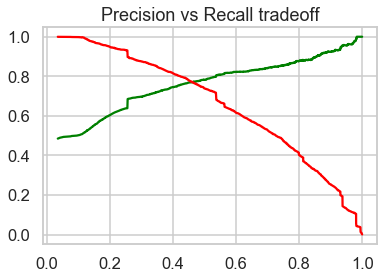

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

**As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5**

### Making predictions on the test set

In [108]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,7.0,66,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,3.0,861,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,8.0,898,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,

In [109]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [110]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6570,0.011952,0.378961,0.1875,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2668,0.031873,0.395246,0.2500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [111]:
# Predicting the test dataset with our final model

test_cols=X_train_5.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg5.predict(X_test_final)       # Predicting the final test set

In [112]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test})

y_test_pred_final.head() 

,Converted,Converted_Probability
4771,1,0.980534
6122,0,0.147886
9202,0,0.740128
6570,1,0.352970
2668,1,0.753269


### Model Evaluation

In [113]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new column in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,Predicted
4771,1,0.980534,1
6122,0,0.147886,0
9202,0,0.740128,1
6570,1,0.352970,0
2668,1,0.753269,1


In [114]:
# Checking the accuracy of the test dataset.

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.7615062761506276


In [115]:
# Checking Precision and Recall

from sklearn.metrics import precision_score, recall_score    

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.7286282306163022
Recall score in predicting test dataset: 0.8002183406113537


### Assigning Lead Score

In [116]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,Predicted,Lead Score
4771,1,0.980534,1,98
6122,0,0.147886,0,15
9202,0,0.740128,1,74
6570,1,0.352970,0,35
2668,1,0.753269,1,75


## Conclusion

 - The Accuracy, Precision and Recall score we got from test set in acceptable range.
 - We have high recall score than precision score which is needed for business..
 - This model has an ability to adjust with the company’s requirements in coming future.
 - This concludes that the model is in stable state.
 - Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
    - **TotalVisits**
    - **Total Time Spent on Website**
    - **Lead Origin_Lead Add Form**